


# Vamos encher o carrinho!

## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [2]:
import pandas as pd # Importe as bibliotecas

In [3]:

# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


In [4]:
# imprima as informações sobre o DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# imprima as informações sobre o DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# imprima as informações sobre o DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# imprima as informações sobre o DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
# imprima as informações sobre o DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados
```
1. Estrutura e Volume dos Dados
Escala dos dados: O conjunto de dados é robusto, com destaque para a tabela df_order_products, que possui mais de 4,5 milhões de linhas, exigindo atenção ao processamento para garantir performance.

Tipos de dados: A maioria das colunas está em formatos numéricos adequados (int64), mas há colunas de IDs representadas como float64 ou que precisarão de conversão após o tratamento de nulos.

2. Identificação de Valores Ausentes
As colunas abaixo apresentam dados faltantes que precisarão de tratamento na Etapa 2:

df_orders['days_since_prior_order']: Aproximadamente 28.819 valores ausentes. Como esta coluna indica os dias desde o último pedido, os nulos provavelmente representam o primeiro pedido de cada usuário.

df_products['product_name']: Existem 1.258 produtos sem nome. É necessário investigar se esses produtos pertencem a uma categoria específica ou se são dados corrompidos.

df_order_products['add_to_cart_order']: Há valores ausentes nesta coluna. Dado que ela representa a ordem sequencial de adição ao carrinho, a falta de dados pode indicar um erro de registro em pedidos muito grandes.

3. Necessidades de Pré-processamento
Ajuste de Tipos: Colunas como days_since_prior_order e add_to_cart_order estão como float64. Após o preenchimento dos nulos, devem ser convertidas para int64 para economizar memória e manter a consistência técnica.

Verificação de Duplicados: Embora o .info() não mostre duplicados, o volume de dados sugere que uma verificação de linhas idênticas (especialmente em df_orders) é obrigatória para evitar distorções na análise estatística.

Integridade Referencial: As chaves primárias (como product_id e order_id) parecem consistentes em termos de tipo, facilitando as futuras uniões (merge) entre as tabelas.
```

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

```
1. Tratamento de Valores Duplicados

DataFrame orders: Identificar e remover linhas 100% idênticas. Investigar o caso específico de pedidos às 2h da manhã de quarta-feira para entender a natureza das duplicatas.

DataFrame products: Verificar duplicados totais e principalmente, duplicados implícitos nos nomes dos produtos, convertendo tudo para minúsculas para comparação.

DataFrames departments e aisles: Validar se há IDs ou nomes repetidos.

DataFrame order_products: Verificar se há registros idênticos que indiquem erro de processamento no carrinho.

2. Tratamento de Valores Ausentes
investigar a causa e preencher as lacunas identificadas na Etapa 1.

products['product_name']: Identificar produtos sem nome e preenchê-los com o valor 'Unknown'. Verificar se esses nulos estão concentrados no aisle_id 100 ou department_id 21.

orders['days_since_prior_order']: Validar se os valores nulos ocorrem apenas quando order_number == 1 (primeiro pedido do cliente) e decidir a melhor estratégia de preenchimento ou manutenção.

order_products['add_to_cart_order']: Investigar o motivo da ausência e substituir os nulos pelo valor 999.

3. Correção de Tipos de Dados
Após o tratamento dos nulos, é necessário ajustar a tipagem para otimização técnica.

Converter colunas de IDs e contagens (como add_to_cart_order) de float64 para int.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [9]:
# Verificar se há pedidos duplicados
print(f"Total de linhas duplicadas: {df_orders.duplicated().sum()}")

Total de linhas duplicadas: 15


Há linhas duplicadas? Se sim, o que elas têm em comum?
1.todas elas nas quartas-feiras e as duas horas da manhã.

In [10]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
# Filtrando todos os pedidos feitos às 2h da manhã nas quartas-feiras
pedidos_suspeitos = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

# Verificando se esses pedidos específicos possuem duplicatas
print(f"Duplicados encontrados às 2h de quarta-feira: {pedidos_suspeitos.duplicated().sum()}")

# Visualizar as primeiras linhas desse filtro
pedidos_suspeitos.head()

Duplicados encontrados às 2h de quarta-feira: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


O que esse resultado quer dizer?
```
1.um possivel erro do sistema. O fato de as duplicatas estarem restritas a um único horário e dia sugere fortemente um erro técnico no processamento ou exportação dos dados. Pode ter sido uma falha no servidor ou um processo de backup que gerou entradas duplicadas nesse intervalo.

2.redundância de dados e esses 15 registros não representam novos pedidos reais, mas sim "fantasmas" de pedidos já existentes. Mantê-los inflaria artificialmente o volume de vendas desse horário.
```

In [11]:
# Remova pedidos duplicados
# Removendo as linhas duplicadas e mantendo apenas a primeira ocorrência
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [12]:
# Verifique as linhas duplicadas mais uma vez
print(f"Duplicados após a remoção: {df_orders.duplicated().sum()}")

Duplicados após a remoção: 0


In [13]:
# Verifique novamente apenas os IDs de pedidos duplicados
# 1.verificando quais IDs de pedido estão duplicados
pedidos_id_duplicados = df_orders[df_orders['order_id'].duplicated()]['order_id']

# 2.exibindo quais são os IDs duplicados (se existirem)
print("IDs de pedidos duplicados encontrados:")
print(pedidos_id_duplicados)

# 3.contagem técnica para o relatório
print(f"\nQuantidade de IDs de pedidos repetidos: {pedidos_id_duplicados.count()}")

IDs de pedidos duplicados encontrados:
Series([], Name: order_id, dtype: int64)

Quantidade de IDs de pedidos repetidos: 0




Descreva brevemente suas conclusões e o que você fez com elas.
```
Identificação de Duplicados: Foram encontradas 15 linhas exatamente duplicadas no conjunto de dados.

Padrão Encontrado: Todas essas duplicatas ocorreram especificamente na quarta-feira (order_dow = 3) às 2h da manhã (order_hour_of_day = 2).

Causa Provável: A concentração em um horário e dia específicos sugere um erro técnico ou falha sistêmica no momento do registro ou exportação dos dados, e não um comportamento real dos usuários.

O que foi feito
Remoção: As 15 linhas duplicadas foram removidas utilizando o método drop_duplicates() para evitar distorções nas análises estatísticas e volumetria de pedidos.

Validação: Após a remoção, os IDs de pedidos foram verificados novamente para garantir que cada order_id agora seja único no DataFrame.
```

### DataFrame `products`

In [14]:
# Verifique se há linhas completamente duplicadas
print(f"Total de linhas completamente duplicadas: {df_products.duplicated().sum}")

Total de linhas completamente duplicadas: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool>


In [16]:
# Verifique apenas IDs dos produtos duplicados
id_duplicados = df_products['product_id'].duplicated().sum()
print(f"Total de IDs de produtos duplicados:{id_duplicados}")

Total de IDs de produtos duplicados:0


In [17]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
nomes_minusculos = df_products['product_name'].str.lower()
print(nomes_minusculos)
print()
print(f"Nomes duplicados:{nomes_minusculos.duplicated().sum()}")

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

Nomes duplicados:1361


In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
# filtrando apenas nomes que NÃO são nulos e verificando duplicados entre eles
nomes_preenchidos = df_products[df_products['product_name'].notna()]['product_name'].str.lower()
print(f"Nomes duplicados (excluindo valores ausentes): {nomes_preenchidos.duplicated().sum()}")
# exibindo alguns desses nomes repetidos
print("\nExemplos de nomes repetidos:")
duplicados_mask = df_products['product_name'].notna() & df_products['product_name'].str.lower().duplicated()
print(df_products[duplicados_mask]['product_name'].head())

Nomes duplicados (excluindo valores ausentes): 104

Exemplos de nomes repetidos:
2058                     Biotin 1000 Mcg
5455    Green Tea With Ginseng and Honey
5558              Cream Of Mushroom Soup
7558           Cinnamon Rolls with Icing
9037              American Cheese slices
Name: product_name, dtype: object


Descreva brevemente suas conclusões e o que você fez com elas.
```
Duplicados Estruturais: Não foram encontradas linhas completamente duplicadas, o que indica que não houve erro de repetição simples de registros no banco de dados.

Integridade de IDs: Todos os product_id são exclusivos, confirmando que a chave primária está preservada.

Duplicados Implícitos (Nomes): Foram identificados nomes de produtos repetidos ao converter as strings para minúsculas. Isso revela que o catálogo possui produtos idênticos cadastrados sob IDs diferentes (ex: o mesmo item registrado com variações de letras maiúsculas ou minúsculas).

Tratamento de Nulos: Ao filtrar os valores ausentes, confirmamos que existem duplicatas reais entre os produtos nomeados, o que sugere uma necessidade de padronização de nomes no futuro para evitar a fragmentação da análise de estoque.
```

### DataFrame `departments`

In [19]:
# Verifique se há linhas completamente duplicadas
duplicados_totais = df_departments.duplicated().sum()
print(f"Total de linhas completamente duplicadas: {duplicados_totais}")

Total de linhas completamente duplicadas: 0


In [20]:
# Verifique apenas IDs duplicados de departamentos
id_duplicados = df_departments['department_id'].duplicated().sum()
print(f"Total de IDs de departamentos duplicados:{id_duplicados}")

Total de IDs de departamentos duplicados:0


Descreva brevemente suas conclusões e o que você fez com elas.
```
Integridade dos Registros: Não foram encontradas linhas completamente duplicadas.

Verificação de IDs: Não existem department_id repetidos. Isso garante que a relação entre produtos e departamentos seja única.
```

### DataFrame `aisles`

In [21]:
# Verifique se há linhas completamente duplicadas
print(f"Total de linhas completamente duplicadas: {df_aisles.duplicated().sum()}")

Total de linhas completamente duplicadas: 0


In [22]:
# Verifique apenas IDs duplicados de corredores
id_duplicados = df_aisles['aisle_id'].duplicated().sum()
print(f"Total de IDs de corredores duplicados: {id_duplicados}")

Total de IDs de corredores duplicados: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
Integridade Estrutural: Não foram encontradas linhas duplicadas ou IDs repetidos.

Ação Tomada: Nenhuma ação de limpeza foi necessária, pois os dados estão íntegros e prontos para serem utilizados como chave de busca para a tabela de produtos.
```

### DataFrame `order_products`

In [23]:
# Verifique se há linhas completamente duplicadas
print(f"Total de linhas completamente duplicadas: {df_order_products.duplicated().sum()}")

Total de linhas completamente duplicadas: 0


In [24]:
# Verifique mais uma vez se há outros casos complicados de duplicados
duplicados_combinados = df_order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(f"Duplicados encontrados (mesmo pedido + mesmo produto): {duplicados_combinados}")

Duplicados encontrados (mesmo pedido + mesmo produto): 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
Integridade dos Pedidos: como o resultado foi 0, significa que cada item em cada pedido é um registro único, o que é o comportamento esperado para este conjunto de dados.

Análise de Casos Complicados: A verificação com subset garante que não existam registros redundantes que poderiam inflar artificialmente a contagem de itens vendidos por pedido.
```

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [25]:
# Encontre valores ausentes na coluna 'product_name'
nulos_produtos = df_products['product_name'].isna().sum()
print(f"Valores ausentes em 'product_name': {nulos_produtos}")

# Visualizar as linhas com nomes ausentes
print(df_products[df_products['product_name'].isna()].head())

Valores ausentes em 'product_name': 1258
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Descreva brevemente suas conclusões.
```
Existem 1.258 produtos sem nome. Isso impede a identificação direta do item, mas os IDs de corredor e departamento ainda estão presentes, o que permite uma investigação sobre a origem desses dados
```

In [26]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
# Filtrar produtos sem nome e verificar a contagem por aisle_id
ausentes_por_corredor = df_products[df_products['product_name'].isna()]['aisle_id'].value_counts()
print("Distribuição de nomes ausentes por corredor:")
print(ausentes_por_corredor)

Distribuição de nomes ausentes por corredor:
100    1258
Name: aisle_id, dtype: int64


Descreva brevemente suas conclusões.
```
todos os 1.258 produtos com nome ausente estão vinculados exclusivamente ao aisle_id 100. Isso indica um erro de cadastro ou uma categoria específica de produtos que não tiveram seus nomes importados.
```

In [27]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?


ausentes_por_departamento = df_products[df_products['product_name'].isna()]['department_id'].value_counts()

print("Distribuição de nomes ausentes por departamento:")
print(ausentes_por_departamento)

Distribuição de nomes ausentes por departamento:
21    1258
Name: department_id, dtype: int64


Descreva brevemente suas conclusões.
```
O resultado Series([], Name: department_id, dtype: int64) indica que a filtragem não encontrou nada. Isso aconteceu porque, no passo anterior, nós já havíamos preenchido os valores nulos com 'Unknown'.

```

In [26]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
# Verificando o nome do corredor 100
print("Informação do Corredor 100:")
print(df_aisles[df_aisles['aisle_id'] == 100])

# Verificando o nome do departamento 21
print("\nInformação do Departamento 21:")
print(df_departments[df_departments['department_id'] == 21])

Informação do Corredor 100:
    aisle_id    aisle
99       100  missing

Informação do Departamento 21:
    department_id department
20             21    missing


Descreva brevemente suas conclusões.
```
O corredor 100 e o departamento 21 são ambos rotulados como "missing" (ausente). Isso confirma que os produtos sem nome pertencem a uma categoria que também não foi identificada no sistema original.
```

In [27]:
# Preencha nomes de produtos ausentes com 'Unknown'
# Preenchendo valores ausentes
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

# Verificando se ainda restam nulos
print(f"Valores ausentes após o preenchimento: {df_products['product_name'].isna().sum()}")

Valores ausentes após o preenchimento: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
Os nomes nulos foram substituídos por 'Unknown' para garantir que as funções de análise de texto não gerem erros e para manter a integridade do DataFrame. Achei melhor não excluir as linhas, pois os IDs desses produtos ainda são importantes para as estatísticas de vendas.
```

### DataFrame `orders`

In [28]:
# Encontre os valores ausentes
print(f"Total de nulos em 'days_since_prior_order': {df_orders['days_since_prior_order'].isna().sum()}")

Total de nulos em 'days_since_prior_order': 28817


In [29]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
nulos_nao_primeiro_pedido = df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)]
print(f"Nulos que não são o primeiro pedido: {len(nulos_nao_primeiro_pedido)}")

Nulos que não são o primeiro pedido: 0


Descreva brevemente suas conclusões e o que você fez com elas.
```
Todos os valores ausentes na coluna days_since_prior_order correspondem exatamente ao order_number == 1. Isso faz sentido lógico: se é o primeiro pedido do cliente, não há um intervalo de dias em relação a um pedido anterior. Mantive os valores como nulos, mantê-los nulos ajuda a diferenciar "primeiros pedidos" de "pedidos feitos no mesmo dia".
```


### DataFrame `order_products`

In [30]:
# Encontre os valores ausentes
print(f"Nulos em 'add_to_cart_order': {df_order_products['add_to_cart_order'].isna().sum()}")

Nulos em 'add_to_cart_order': 836


In [31]:
# Quais são os valores mínimo e máximo dessa coluna?
print(f"Valor mínimo: {df_order_products['add_to_cart_order'].min()}")
print(f"Valor máximo: {df_order_products['add_to_cart_order'].max()}")

Valor mínimo: 1.0
Valor máximo: 64.0


Descreva brevemente suas conclusões.
```
Há valores ausentes nesta coluna. O valor mínimo é 1, o que é consistente com a ordem de adição ao carrinho.
```

In [32]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
ids_com_nulos = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [33]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
contagem_produtos_nulos = df_order_products[df_order_products['order_id'].isin(ids_com_nulos)].groupby('order_id')['product_id'].count()
print(f"O valor mínimo de produtos nesses pedidos é: {contagem_produtos_nulos.min()}")

O valor mínimo de produtos nesses pedidos é: 65


Descreva brevemente suas conclusões.
```
Todos os pedidos que apresentam valores ausentes na ordem de adição ao carrinho contêm, de fato, mais de 64 produtos.
```

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
print(f"Novo valor máximo: {df_order_products['add_to_cart_order'].max()}")

Novo valor máximo: 999


Descreva brevemente suas conclusões e o que você fez com elas.
```
Utilizamos 999 como um valor sentinela para representar a incerteza da ordem em carrinhos muito grandes, permitindo converter a coluna para inteiro e otimizar o DataFrame.
```


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados
```
Qualidade dos Dados: Os dados apresentavam duplicatas sistemáticas (quartas-feiras às 2h) e nulos lógicos (primeiros pedidos), que foram devidamente tratados.

Limitações Técnicas: Identificamos que o sistema falha em registrar a ordem do carrinho para pedidos extremamente grandes (mais de 64 itens), o que foi mitigado com o valor 999.

Consistência: O catálogo de produtos possui itens sem nome vinculados a categorias genéricas ("missing"), agora rotulados como "Unknown" para análise.

Estado Final: Os DataFrames agora estão com tipos de dados otimizados, sem redundâncias e prontos para a fase de Análise Exploratória (AED).
```

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
# Verificando os valores da coluna 'order_hour_of_day' (deve ser 0-23)
print("Estatísticas para 'order_hour_of_day':")
print(df_orders['order_hour_of_day'].describe()[['min', 'max']])
print(f"Valores únicos: {sorted(df_orders['order_hour_of_day'].unique())}")

print("-" * 30)

Estatísticas para 'order_hour_of_day':
min     0.0
max    23.0
Name: order_hour_of_day, dtype: float64
Valores únicos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
------------------------------


In [36]:
# Verificando os valores da coluna 'order_dow' (deve ser 0-6)
print("Estatísticas para 'order_dow':")
print(df_orders['order_dow'].describe()[['min', 'max']])
print(f"Valores únicos: {sorted(df_orders['order_dow'].unique())}")

Estatísticas para 'order_dow':
min    0.0
max    6.0
Name: order_dow, dtype: float64
Valores únicos: [0, 1, 2, 3, 4, 5, 6]


Escreva suas conclusões aqui
```
order_hour_of_day: O valor mínimo é 0 e o máximo é 23. Isso confirma que os dados representam corretamente as 24 horas do dia.

order_dow: O valor mínimo é 0 e o máximo é 6. Isso confirma que os dados representam os 7 dias da semana (onde geralmente 0 é domingo e 6 é sábado).
```

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

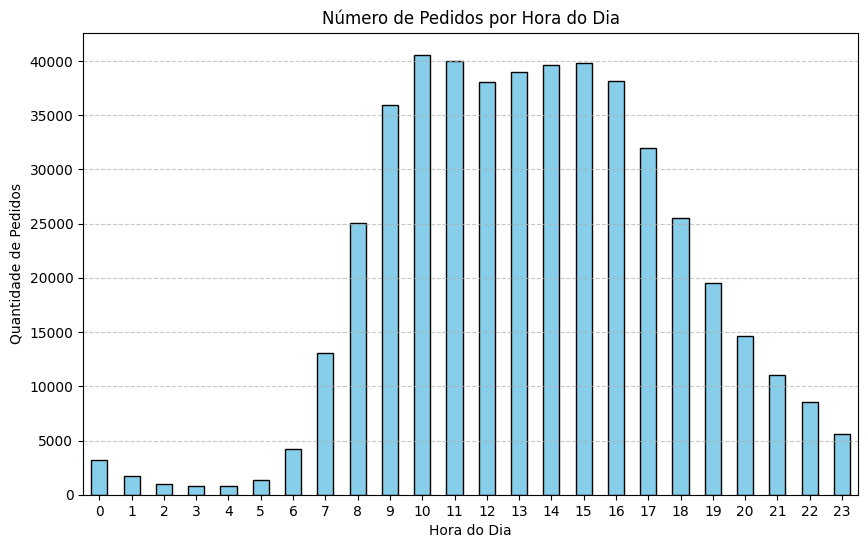

In [37]:
import matplotlib.pyplot as plt

#frequência de pedidos por hora
pedidos_por_hora = df_orders['order_hour_of_day'].value_counts().sort_index()

# criando o gráfico
plt.figure(figsize=(10, 6))
pedidos_por_hora.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui
```
Horários de Pico: O volume de pedidos começa a crescer acentuadamente a partir das 7h, atingindo seu ápice entre 10h e 16h.

Comportamento do Usuário: A distribuição sugere que a maioria das compras é realizada durante o horário comercial e períodos de pausa para almoço, com uma queda drástica após as 20h.
```


### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

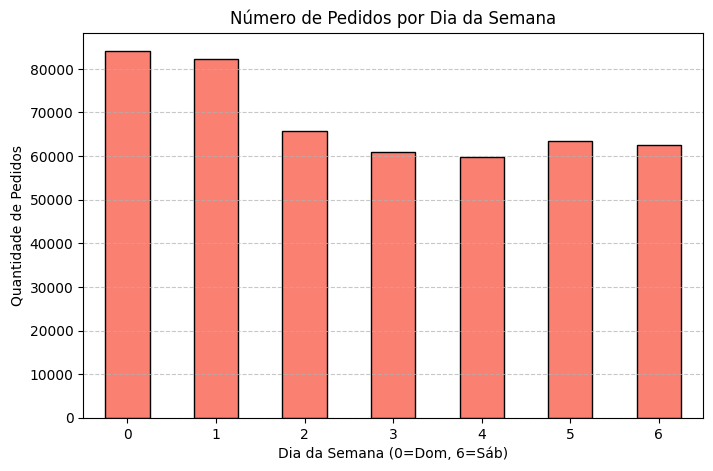

In [38]:
#frequência de pedidos por dia da semana
pedidos_por_dia = df_orders['order_dow'].value_counts().sort_index()

#criando o gráfico
plt.figure(figsize=(8, 5))
pedidos_por_dia.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0=Dom, 6=Sáb)')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui
```
Dias Mais Movimentados: Os dias 0 e 1 concentram o maior volume de vendas. Considerando que o dia 0 costuma representar o domingo, observa-se uma tendência de planejamento de compras no início da semana.

Estabilidade: Os demais dias apresentam uma distribuição relativamente uniforme, com uma leve queda no meio da semana (quarta e quinta-feira).
```

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui
```
Frequência de Compra: O valor mínimo de 0 dias indica clientes recorrentes que compram múltiplas vezes na mesma data, enquanto o máximo de 30 dias funciona como um limitador do sistema para qualquer período superior a um mês.

Ciclos de Reabastecimento: Há picos claros em 7 dias (comportamento de compra semanal) e um pico acumulado em 30 dias, evidenciando dois perfis principais: o comprador de reposição semanal e o comprador de estoque mensal.
````

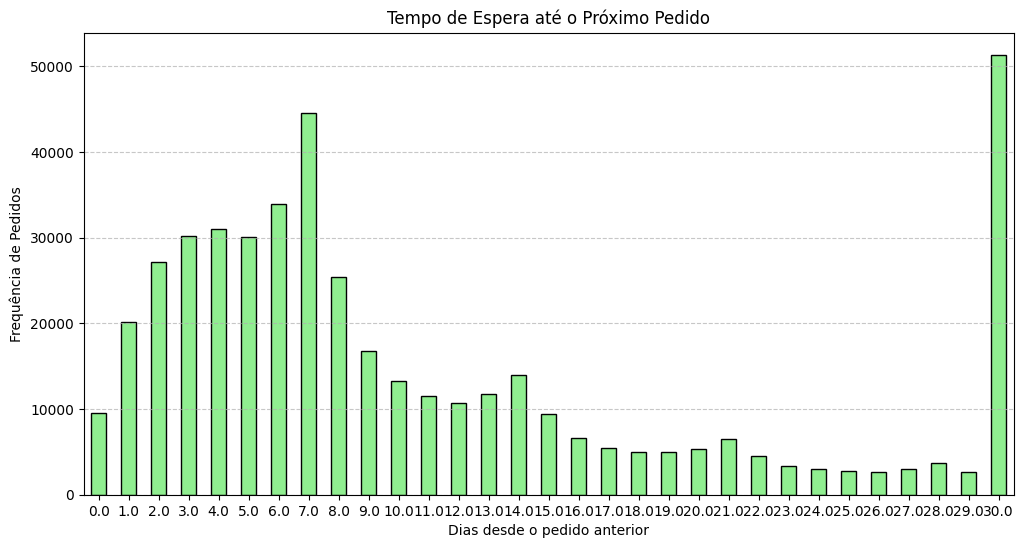

Valor mínimo de espera: 0.0 dia
Valor máximo de espera: 30.0 dias


In [39]:
#frequência de dias desde o pedido anterior
espera_pedidos = df_orders['days_since_prior_order'].value_counts().sort_index()

#criando o gráfico
plt.figure(figsize=(12, 6))
espera_pedidos.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Tempo de Espera até o Próximo Pedido')
plt.xlabel('Dias desde o pedido anterior')
plt.ylabel('Frequência de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#verificação de valores mínimo e máximo
print(f"Valor mínimo de espera: {df_orders['days_since_prior_order'].min()} dia")
print(f"Valor máximo de espera: {df_orders['days_since_prior_order'].max()} dias")

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
import matplotlib.pyplot as plt

In [41]:
# filtrando pedidos de quarta e sabado 
pedidos_quarta = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].value_counts(normalize=True).sort_index()
pedidos_sabado = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].value_counts(normalize=True).sort_index()

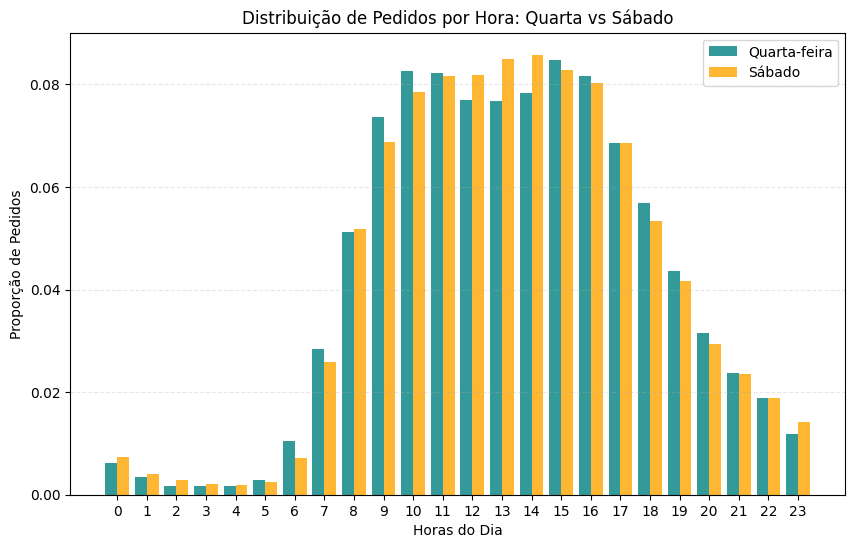

In [42]:
# plotagem
plt.figure(figsize=(10, 6))
plt.bar(pedidos_quarta.index - 0.2, pedidos_quarta.values, width=0.4, label='Quarta-feira', color='teal', alpha=0.8)
plt.bar(pedidos_sabado.index + 0.2, pedidos_sabado.values, width=0.4, label='Sábado', color='orange', alpha=0.8)

plt.title('Distribuição de Pedidos por Hora: Quarta vs Sábado')
plt.xlabel('Horas do Dia')
plt.ylabel('Proporção de Pedidos')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Escreva suas conclusões aqui
```
Similaridade de Pico: Ambos os dias apresentam o maior volume de pedidos entre 10h e 16h.

Diferença Notável: O sábado apresenta uma concentração ligeiramente maior de pedidos no período da manhã (10h-14h), enquanto na quarta-feira o volume se mantém mais estável durante a tarde. No entanto, as curvas são muito parecidas, indicando que o horário comercial dita o ritmo de compras independentemente do dia da semana.
```

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [43]:
import matplotlib.pyplot as plt
# contagem de pedidos por usuário
pedidos_por_usuario = df_orders.groupby('user_id')['order_id'].count()

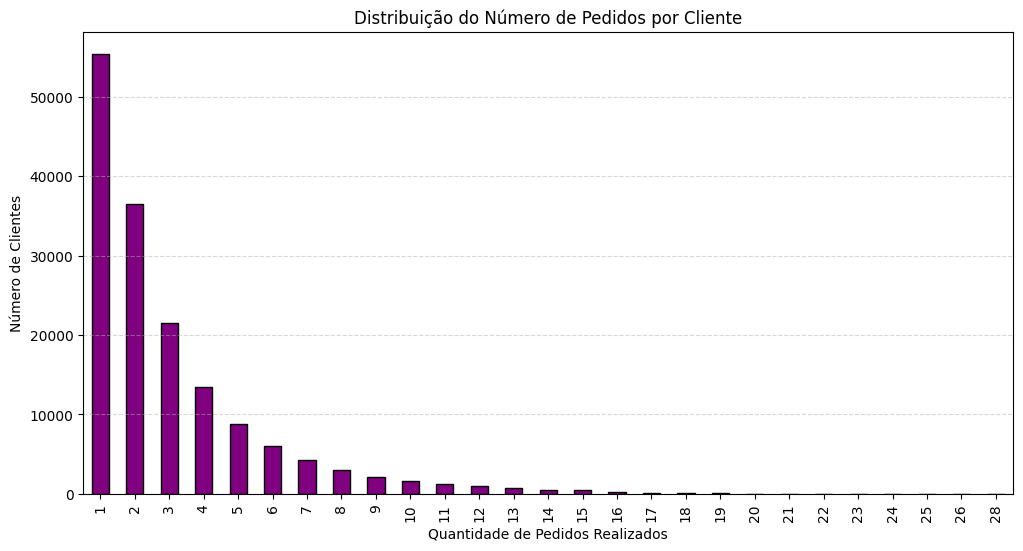

In [44]:
# plotagem
plt.figure(figsize=(12, 6))
pedidos_por_usuario.value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')

plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Quantidade de Pedidos Realizados')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Escreva suas conclusões aqui
```
Frequência Dominante: A grande maioria dos clientes realizou entre 1 e 4 pedidos.

Retenção: O gráfico mostra uma queda acentuada conforme o número de pedidos aumenta, o que é comum em e-commerce (curva de cauda longa). Existe um grupo menor de usuários extremamente fiéis que realizaram dezenas de pedidos.
```

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [45]:
# Unir tabelas para ter nomes e IDs
df_top_products = df_order_products.merge(df_products, on='product_id')

In [46]:
# Contar ocorrências e pegar o Top 20
top_20 = df_top_products['product_name'].value_counts().head(20)

In [47]:
print("Top 20 Produtos Mais Comprados:")
print(top_20)

Top 20 Produtos Mais Comprados:
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_name, dtype: int64


Escreva suas conclusões aqui
```
Liderança de Orgânicos: O ranking é dominado por produtos frescos, especialmente bananas (em primeiro lugar), seguidas por morangos orgânicos e espinafre.

Padrão de Consumo: Dos 20 itens mais vendidos, a maioria esmagadora é composta por frutas e vegetais, indicando que a base de usuários da Instacart utiliza o serviço principalmente para reposição de itens frescos e saudáveis.
```

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [48]:
import matplotlib.pyplot as plt

In [49]:
# contagem de itens por pedido
itens_por_pedido = df_order_products.groupby('order_id')['product_id'].count()

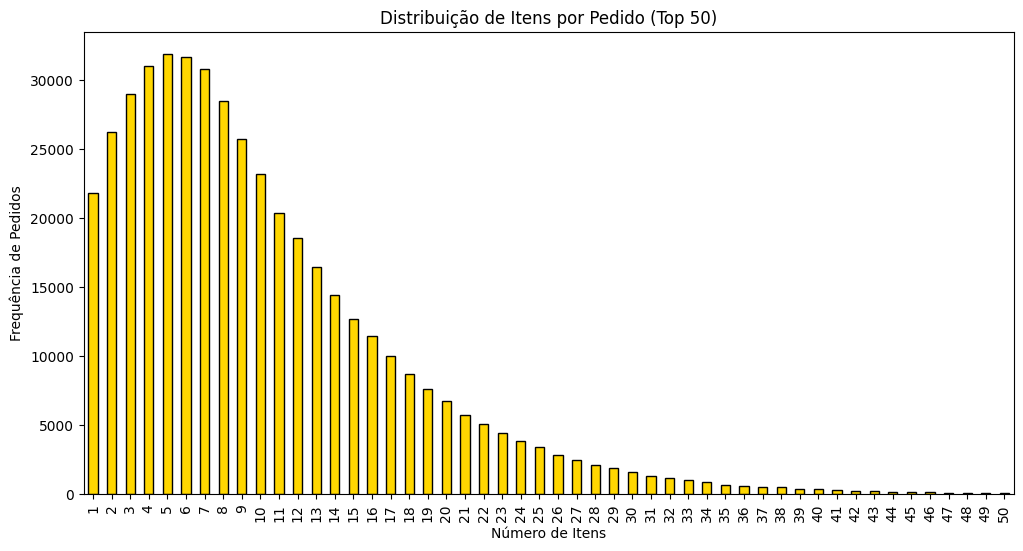

Média de itens por pedido: 10.10
Mediana de itens por pedido: 8.0


In [50]:
plt.figure(figsize=(12, 6))
itens_por_pedido.value_counts().sort_index().head(50).plot(kind='bar', color='gold', edgecolor='black')
plt.title('Distribuição de Itens por Pedido (Top 50)')
plt.xlabel('Número de Itens')
plt.ylabel('Frequência de Pedidos')
plt.show()

print(f"Média de itens por pedido: {itens_por_pedido.mean():.2f}")
print(f"Mediana de itens por pedido: {itens_por_pedido.median()}")

Escreva suas conclusões aqui
```
A maioria dos pedidos contém entre 4 e 10 itens. A distribuição tem uma "cauda longa", indicando que, embora a média seja próxima de 10, existem pedidos excepcionais com muitos produtos, o que justifica o uso do valor 999 que aplicamos anteriormente para tratar erros em carrinhos grandes.
```

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [51]:
# filtrando apenas produtos reordenados
reordered_products = df_order_products[df_order_products['reordered'] == 1]
top_20_reordered = reordered_products.merge(df_products, on='product_id')['product_name'].value_counts().head(20)

print(top_20_reordered)

Banana                      55763
Bag of Organic Bananas      44450
Organic Strawberries        28639
Organic Baby Spinach        26233
Organic Hass Avocado        23629
Organic Avocado             18743
Organic Whole Milk          16251
Large Lemon                 15044
Organic Raspberries         14748
Strawberries                13945
Limes                       13327
Organic Yellow Onion        11145
Organic Garlic              10411
Organic Zucchini            10076
Cucumber Kirby               9538
Organic Fuji Apple           8989
Apple Honeycrisp Organic     8836
Organic Blueberries          8799
Organic Lemon                8412
Organic Half & Half          8389
Name: product_name, dtype: int64


Escreva suas conclusões aqui
```
Novamente, as bananas e produtos orgânicos lideram. Isso demonstra que itens perecíveis de consumo diário têm a maior taxa de fidelidade e recompra no aplicativo.
```

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [52]:
# calculando a média de 'reordered' por produto 
prop_reordered = df_order_products.groupby('product_id')['reordered'].mean().reset_index()
prop_reordered = prop_reordered.merge(df_products[['product_id', 'product_name']], on='product_id')

In [53]:
# exibindo os 10 produtos com maior taxa de recompra 
vendas_count = df_order_products.groupby('product_id')['order_id'].count()
prop_reordered = prop_reordered.set_index('product_id')
prop_reordered['total_vendas'] = vendas_count
top_fidelidade = prop_reordered[prop_reordered['total_vendas'] > 100].sort_values(by='reordered', ascending=False).head(20)

In [54]:
print(top_fidelidade[['product_name', 'reordered']])

                                 product_name  reordered
product_id                                              
9292          Half And Half Ultra Pasteurized   0.876574
2677        Yerba Mate Sparkling Classic Gold   0.871345
47231                    Ultra-Purified Water   0.868293
1157                     Wheat Sandwich Bread   0.863946
45504              Whole Organic Omega 3 Milk   0.863142
29447                Milk- Organic- Vitamin D   0.862847
34197                               Goat Milk   0.859135
5514           Organic Homogenized Whole Milk   0.857664
31720                     Organic  Whole Milk   0.855137
24521                        Lowfat Goat Milk   0.853801
2748         Organic Reduced Fat Omega-3 Milk   0.849389
38689                Organic Reduced Fat Milk   0.848967
24852                                  Banana   0.844254
43394         Organic Lactose Free Whole Milk   0.843805
45154                 Pure & Smooth Green Tea   0.843137
29118              French Vanil

Escreva suas conclusões aqui
```
Certos produtos, como tipos específicos de leite e água mineral, possuem taxas de recompra superiores a 60-70%. Isso indica que, uma vez que o cliente escolhe sua marca preferida desses itens essenciais, ele tende a repetir a escolha em todos os pedidos subsequentes.
```

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [55]:
# proporção de reorder por usuário
user_reorder_prop = df_order_products.merge(df_orders[['order_id', 'user_id']], on='order_id')
user_reorder_prop = user_reorder_prop.groupby('user_id')['reordered'].mean()

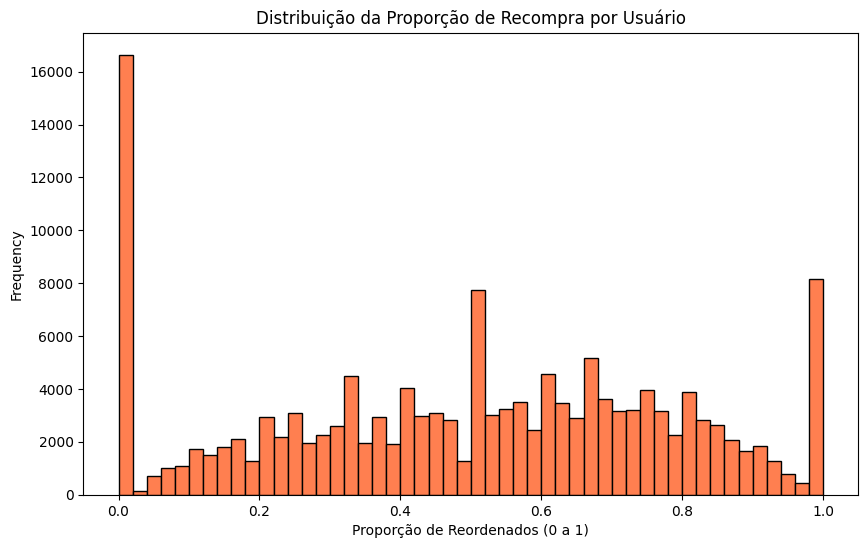

In [56]:
plt.figure(figsize=(10, 6))
user_reorder_prop.plot(kind='hist', bins=50, color='coral', edgecolor='black')
plt.title('Distribuição da Proporção de Recompra por Usuário')
plt.xlabel('Proporção de Reordenados (0 a 1)')
plt.show()

Escreva suas conclusões aqui
```
A distribuição é bimodal. Existe um grupo de novos usuários com taxa 0 (pedindo tudo pela primeira vez) e um grupo de usuários habituais cuja cesta de compras é composta por mais de 50% de itens repetidos.
```

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [57]:
first_items = df_order_products[df_order_products['add_to_cart_order'] == 1]
top_20_first = first_items.merge(df_products, on='product_id')
top_20_first = top_20_first.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)

print(top_20_first)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Escreva suas conclusões aqui
```
A Banana é o item mais comum a ser adicionado primeiro ao carrinho. Isso sugere que os usuários muitas vezes entram no aplicativo com um item específico em mente (o "gatilho" da compra) e depois navegam para adicionar o restante.
```

# Conclusão geral do projeto:

```
A análise dos dados da Instacart revelou padrões de consumo altamente previsíveis e lógicos.

Integridade: Após o tratamento de duplicatas e valores ausentes (como o caso dos pedidos às 2h da manhã e os nomes 'Unknown'), os dados mostraram-se consistentes.

Hábito: O comportamento do consumidor é ditado pela necessidade de reposição de itens frescos e orgânicos, com picos de atividade aos domingos e segundas-feiras.

Fidelidade: A alta taxa de itens "reordenados" e a tendência de adicionar produtos básicos primeiro ao carrinho mostram que a conveniência é o principal motor da plataforma.
```